In [2]:
import warnings; 
warnings.simplefilter('ignore')


In [3]:
import pandas as pd
from fbprophet import Prophet
import os

In [4]:
path = os.path.join('./Data', 'dataset.csv')

data = pd.read_csv(path)
data

,Time Date,Product,Store,Value
0,1012018,2667437,QLD_CW_ST0203,2926.000000
1,2012018,2667437,QLD_CW_ST0203,2687.531000
2,3012018,2667437,QLD_CW_ST0203,2793.000000
3,4012018,2667437,QLD_CW_ST0203,2394.000000
4,5012018,2667437,QLD_CW_ST0203,2660.000000
...,...,...,...,...
1075,12122020,2667437,QLD_CW_ST0203,3167.594500
1076,13122020,2667437,QLD_CW_ST0203,3167.594500
1077,14122020,2667437,QLD_CW_ST0203,3383.354511
1078,15122020,2667437,QLD_CW_ST0203,2714.591329


In [5]:
print(data['Product'].unique())
print(data['Store'].unique())

[2667437]
['QLD_CW_ST0203']


In [6]:
data.dtypes

Time Date      int64
Product        int64
Store         object
Value        float64
dtype: object

In [7]:
data['Year'] = data['Time Date'].apply(lambda x: str(x)[-4:])
data['Month'] = data['Time Date'].apply(lambda x: str(x)[-6:-4])
data['Day'] = data['Time Date'].apply(lambda x: str(x)[:-6])

data['Time'] = pd.DatetimeIndex(data['Year'] +'-'+ data['Month'] + '-' + data['Day'])

In [27]:
data.tail()

,ds,y
1075,2020-12-12,3167.594500
1076,2020-12-13,3167.594500
1077,2020-12-14,3383.354511
1078,2020-12-15,2714.591329
1079,2020-12-16,2585.035107


In [9]:
"""
For fbprophet we only need two columns for final output : Value and Time
We drop the rest of the columns
"""

data.drop(['Time Date', 'Product', 'Store', 'Year','Month','Day'], axis = 1, inplace = True)
data

,Value,Time
0,2926.000000,2018-01-01
1,2687.531000,2018-01-02
2,2793.000000,2018-01-03
3,2394.000000,2018-01-04
4,2660.000000,2018-01-05
...,...,...
1075,3167.594500,2020-12-12
1076,3167.594500,2020-12-13
1077,3383.354511,2020-12-14
1078,2714.591329,2020-12-15


In [10]:
#Train Model 

m = Prophet(interval_width = 0.6, daily_seasonality = True)
model = m.fit(data)

ValueError: Dataframe must have columns "ds" and "y" with the dates and values respectively.

In [11]:
# we see that fbprophet only needs column names as ds and y, so we now change it
data['ds'] = data['Time']
data['y'] = data['Value']
data.drop(['Value', 'Time'], axis = 1, inplace = True)
data

,ds,y
0,2018-01-01,2926.000000
1,2018-01-02,2687.531000
2,2018-01-03,2793.000000
3,2018-01-04,2394.000000
4,2018-01-05,2660.000000
...,...,...
1075,2020-12-12,3167.594500
1076,2020-12-13,3167.594500
1077,2020-12-14,3383.354511
1078,2020-12-15,2714.591329


In [12]:
m = Prophet(interval_width = 0.96, daily_seasonality = True)
model = m.fit(data)

Initial log joint probability = -33.1653
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99        1946.2   0.000414052       95.8202      0.1724      0.7406      122   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     148       1946.42   0.000275957       98.7166   2.852e-06       0.001      219  LS failed, Hessian reset 
     199       1946.46   1.25704e-06       64.8826     0.04066           1      297   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     207       1946.46   1.19749e-07       43.6799      0.3111      0.8234      307   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


In [34]:
future = m.make_future_dataframe(periods=500,freq='D')
forecast = m.predict(future)
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2018-01-01,3040.462653,660.184206,4094.630304,3040.462653,3040.462653,-645.839364,-645.839364,-645.839364,463.68979,...,16.643716,16.643716,16.643716,-1126.172870,-1126.172870,-1126.172870,0.0,0.0,0.0,2394.623289
1,2018-01-02,3041.255696,719.404796,3985.321331,3041.255696,3041.255696,-655.816581,-655.816581,-655.816581,463.68979,...,-11.263085,-11.263085,-11.263085,-1108.243287,-1108.243287,-1108.243287,0.0,0.0,0.0,2385.439115
2,2018-01-03,3042.048740,797.172369,4195.729787,3042.048740,3042.048740,-629.836306,-629.836306,-629.836306,463.68979,...,-4.394888,-4.394888,-4.394888,-1089.131208,-1089.131208,-1089.131208,0.0,0.0,0.0,2412.212434
3,2018-01-04,3042.841783,844.620243,4048.384478,3042.841783,3042.841783,-582.757660,-582.757660,-582.757660,463.68979,...,22.467514,22.467514,22.467514,-1068.914964,-1068.914964,-1068.914964,0.0,0.0,0.0,2460.084123
4,2018-01-05,3043.634827,779.586997,4094.704502,3043.634827,3043.634827,-618.630432,-618.630432,-618.630432,463.68979,...,-34.594707,-34.594707,-34.594707,-1047.725516,-1047.725516,-1047.725516,0.0,0.0,0.0,2425.004394


In [35]:
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
1575,2022-04-26,4669.604679,2880.857078,6309.166844,4638.820353,4700.329000,-101.887941,-101.887941,-101.887941,463.68979,...,-11.263085,-11.263085,-11.263085,-554.314647,-554.314647,-554.314647,0.0,0.0,0.0,4567.716738
1576,2022-04-27,4670.675281,3132.459272,6412.122689,4639.784659,4701.388166,38.861749,38.861749,38.861749,463.68979,...,-4.394888,-4.394888,-4.394888,-420.433153,-420.433153,-420.433153,0.0,0.0,0.0,4709.537030
1577,2022-04-28,4671.745882,3315.764036,6541.404791,4640.748996,4702.445984,204.652957,204.652957,204.652957,463.68979,...,22.467514,22.467514,22.467514,-281.504348,-281.504348,-281.504348,0.0,0.0,0.0,4876.398839
1578,2022-04-29,4672.816483,3379.994930,6587.604122,4641.713333,4703.503802,290.039580,290.039580,290.039580,463.68979,...,-34.594707,-34.594707,-34.594707,-139.055503,-139.055503,-139.055503,0.0,0.0,0.0,4962.856063
1579,2022-04-30,4673.887084,3453.577524,6808.135273,4642.677670,4704.558239,454.987665,454.987665,454.987665,463.68979,...,-14.022692,-14.022692,-14.022692,5.320567,5.320567,5.320567,0.0,0.0,0.0,5128.874750


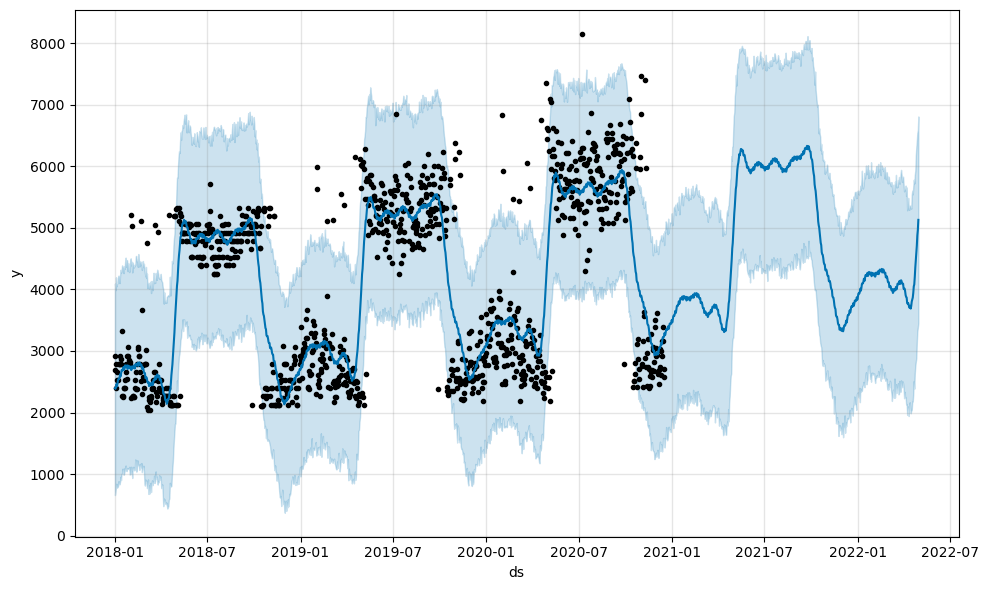

In [36]:
plot1 = m.plot(forecast)

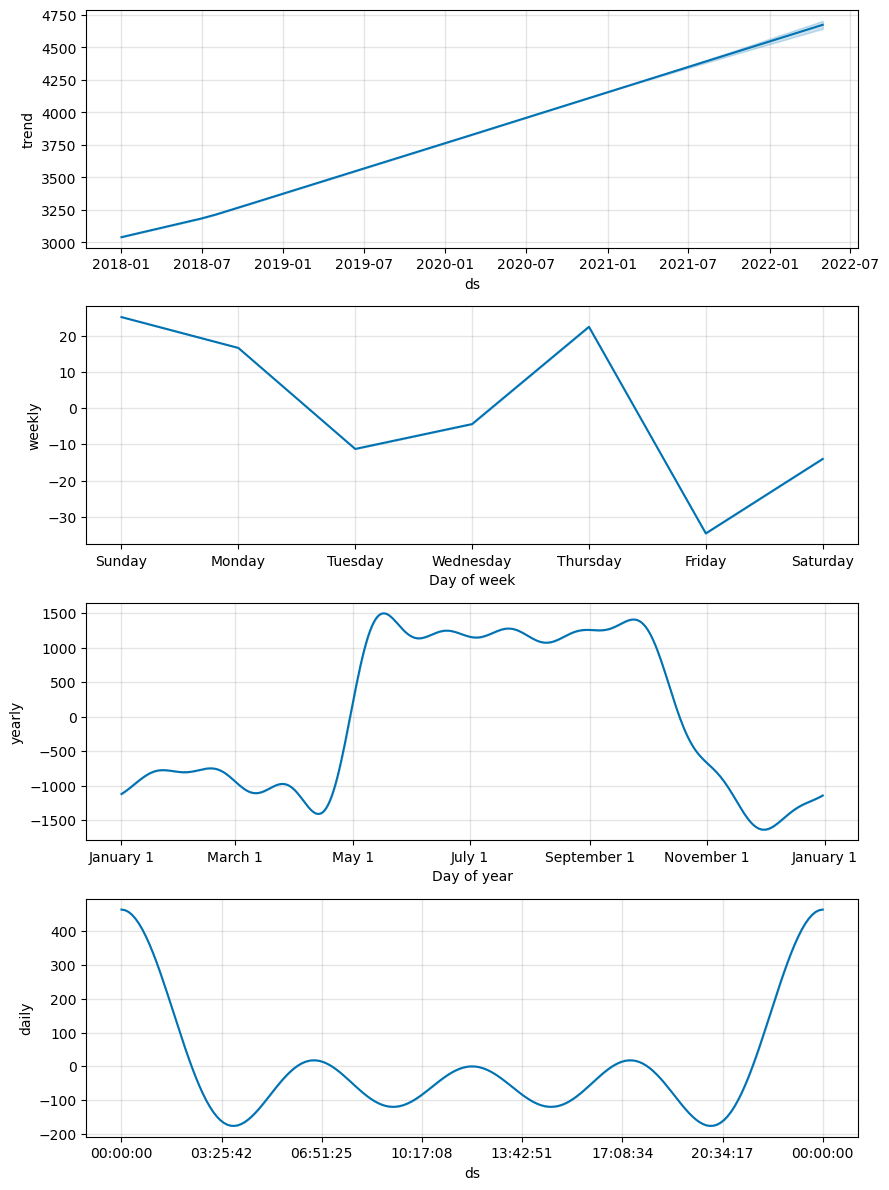

In [37]:
plot2 = m.plot_components(forecast)

In [38]:
future1 = m.make_future_dataframe(periods=100,freq='D')
forecast2 = m.predict(future1)
forecast2.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2018-01-01,3040.462653,744.375276,4121.937071,3040.462653,3040.462653,-645.839364,-645.839364,-645.839364,463.68979,...,16.643716,16.643716,16.643716,-1126.172870,-1126.172870,-1126.172870,0.0,0.0,0.0,2394.623289
1,2018-01-02,3041.255696,655.964098,4199.449552,3041.255696,3041.255696,-655.816581,-655.816581,-655.816581,463.68979,...,-11.263085,-11.263085,-11.263085,-1108.243287,-1108.243287,-1108.243287,0.0,0.0,0.0,2385.439115
2,2018-01-03,3042.048740,715.479649,4085.148955,3042.048740,3042.048740,-629.836306,-629.836306,-629.836306,463.68979,...,-4.394888,-4.394888,-4.394888,-1089.131208,-1089.131208,-1089.131208,0.0,0.0,0.0,2412.212434
3,2018-01-04,3042.841783,804.162439,4153.556596,3042.841783,3042.841783,-582.757660,-582.757660,-582.757660,463.68979,...,22.467514,22.467514,22.467514,-1068.914964,-1068.914964,-1068.914964,0.0,0.0,0.0,2460.084123
4,2018-01-05,3043.634827,709.650725,3973.598149,3043.634827,3043.634827,-618.630432,-618.630432,-618.630432,463.68979,...,-34.594707,-34.594707,-34.594707,-1047.725516,-1047.725516,-1047.725516,0.0,0.0,0.0,2425.004394


In [39]:
forecast2.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
1175,2021-03-22,4241.364176,2079.865143,5392.464990,4237.992129,4244.454862,-518.137410,-518.137410,-518.137410,463.68979,...,16.643716,16.643716,16.643716,-998.470917,-998.470917,-998.470917,0.0,0.0,0.0,3723.226765
1176,2021-03-23,4242.434777,2054.149157,5239.980023,4239.020950,4245.573452,-535.598019,-535.598019,-535.598019,463.68979,...,-11.263085,-11.263085,-11.263085,-988.024724,-988.024724,-988.024724,0.0,0.0,0.0,3706.836758
1177,2021-03-24,4243.505378,1964.510396,5467.370220,4240.026813,4246.694980,-521.063000,-521.063000,-521.063000,463.68979,...,-4.394888,-4.394888,-4.394888,-980.357903,-980.357903,-980.357903,0.0,0.0,0.0,3722.442378
1178,2021-03-25,4244.575980,2082.287674,5292.422980,4241.050269,4247.801235,-489.896577,-489.896577,-489.896577,463.68979,...,22.467514,22.467514,22.467514,-976.053882,-976.053882,-976.053882,0.0,0.0,0.0,3754.679403
1179,2021-03-26,4245.646581,2167.371065,5364.063312,4242.085155,4248.901384,-546.515985,-546.515985,-546.515985,463.68979,...,-34.594707,-34.594707,-34.594707,-975.611069,-975.611069,-975.611069,0.0,0.0,0.0,3699.130596


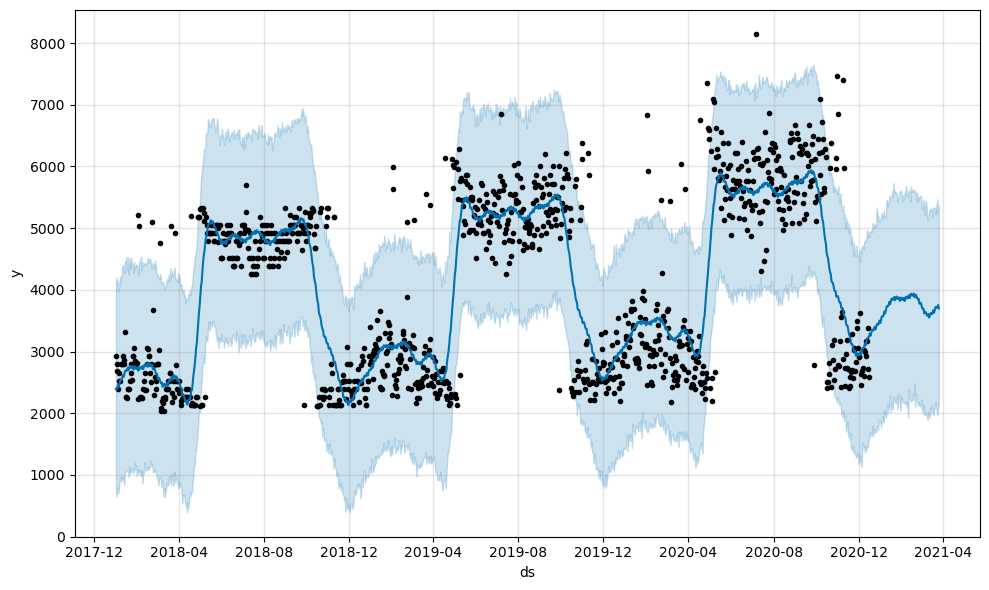

In [40]:
plot = m.plot(forecast2)